In [119]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap

import scienceplots

In [2]:

def create_halo(center, radius, grid_size):
    """Create a binary mask for a halo in a grid based on its center and radius."""
    y, x = np.ogrid[-center[0]:grid_size-center[0], -center[1]:grid_size-center[1]]
    mask = x*x + y*y <= radius*radius
    return mask


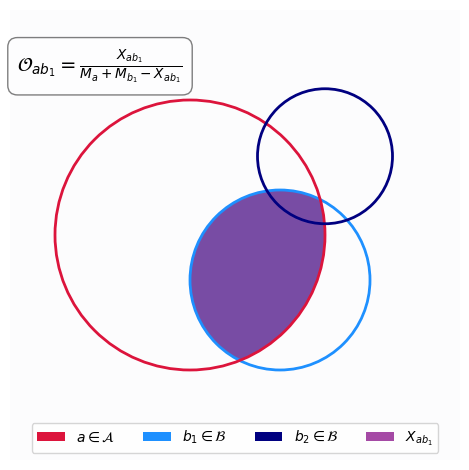

In [124]:
# Plot parameters
grid_size = 5000

halo_a_center = (0.6 * grid_size, 0.6 * grid_size)
halo_a_radius = 0.2 * grid_size

halo_b_center = (0.5 * grid_size, 0.4 * grid_size)
halo_b_radius = 0.3 * grid_size

halo_c_center = (0.325 * grid_size, 0.7 * grid_size)
halo_c_radius = 0.15 * grid_size

# Create grid masks for the haloes
halo_a_mask = create_halo(halo_a_center, halo_a_radius, grid_size)
halo_a_circle = patches.Circle((halo_a_center[1], grid_size - halo_a_center[0]), halo_a_radius, fill=False, color="dodgerblue", linewidth=2)

halo_b_mask = create_halo(halo_b_center, halo_b_radius, grid_size)
halo_b_circle = patches.Circle((halo_b_center[1], grid_size - halo_b_center[0]), halo_b_radius, fill=False, color='crimson', linewidth=2)

halo_c_mask = create_halo(halo_c_center, halo_c_radius, grid_size)
halo_c_circle = patches.Circle((halo_c_center[1], grid_size - halo_c_center[0]), halo_c_radius, fill=False, color='navy', linewidth=2)

# Calculate the overlap
overlap_mask_a_b1 = halo_a_mask & halo_b_mask
overlap_mask_a_b2 = halo_b_mask & halo_c_mask

fig, ax = plt.subplots()
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# Display Halo A
# ax.imshow(halo_a_mask, extent=(0, grid_size, 0, grid_size), interpolation='none', cmap='Reds', alpha=0., label=r"Halo $a \in \mathcal{A}$")
ax.add_patch(halo_a_circle)

# Display Halo B
# ax.imshow(halo_b_mask, extent=(0, grid_size, 0, grid_size), interpolation='none', cmap='Blues', alpha=0., label='Halo B')
ax.add_patch(halo_b_circle)

# Display Halo C
# ax.imshow(halo_c_mask, extent=(0, grid_size, 0, grid_size), interpolation='none', cmap='Greens', alpha=0., label='Halo C')
ax.add_patch(halo_c_circle)

# Highlight the overlap
gold_cmap = ListedColormap(['gold'])
ax.imshow(overlap_mask_a_b1, extent=(0, grid_size, 0, grid_size), interpolation='none', cmap="Purples", label='Overlap', alpha=0.7)
# ax.imshow(overlap_mask_a_b2, extent=(0, grid_size, 0, grid_size), interpolation='none', cmap='Purples', alpha=0.25, label='Overlap')

# Annotations and labels
# ax.set_title('Toy Model of Halo Overlap')
# ax.set_xlabel('X Coordinate')
# ax.set_ylabel('Y Coordinate')

# Creating a legend with color patches
legend_elements = [patches.Patch(facecolor='crimson', label=r"$a \in \mathcal{A}$"),
                   patches.Patch(facecolor='dodgerblue', label=r"$b_1 \in \mathcal{B}$"),
                   patches.Patch(facecolor='navy', label=r"$b_2 \in \mathcal{B}$"),
                   patches.Patch(facecolor='purple', alpha=0.7, label=r"$X_{a b_1}$")]

ax.legend(handles=legend_elements, ncol=4, loc="lower center")
# ax.legend()
# Grid
ax.set_xticks(np.arange(0, grid_size + 1, int(0.1 * grid_size)), labels=[])
ax.set_yticks(np.arange(0, grid_size + 1, int(0.1 * grid_size)), labels=[])
# ax.grid(True, which='both', color='black', linewidth=0.5, linestyle='--', alpha=0.7)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Hide bottom and left spines
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Hide the ticks
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

# Hide the tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Equation to be added
equation = r"$\mathcal{O}_{a b_1} = \frac{X_{a b_1}}{M_a + M_{b_1} - X_{a b_1}}$"

# Add the text with a box around it
ax.text(0.2 * grid_size, 0.875 * grid_size, equation, fontsize=14, verticalalignment='center', 
        horizontalalignment='center', bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.5'))
fig.tight_layout()
fig.savefig("../../plots/overlap_figure.pdf", dpi=450, bbox_inches='tight')
fig.show()